<a href="https://colab.research.google.com/github/manishwar1276/ADM_Project/blob/main/ADM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Customer Analytics Full Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [9]:
df = pd.read_csv("/content/customer_analytics_table.csv")


In [10]:
# 1. Dataset Head
print(df.head())

                            Customer_ID       Full_Name  Age  Gender  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d    Daniel Doyle   58    Male   
1  28df6ec4-ce4a-4bbd-8241-330b01a9e71f      Gina Moore   20    Male   
2  11ce5dd2-b45e-41f0-b139-d32c93cd59bf  Darren Roberts   46   Other   
3  ece66fa2-fd51-46e6-851b-4cf36123fdf7   Kristin Cohen   31  Female   
4  24933b83-7577-40a9-a491-f0b2ea1fca65   David Hoffman   52    Male   

                     Location Product_Category   Price  Quantity  \
0     New Roberttown, Bermuda      Electronics  372.07         2   
1          Curtisfurt, Bhutan      Electronics  113.23         5   
2  Port Jesseville, Hong Kong            Books  405.67         1   
3       East Lydiamouth, Iran      Electronics   50.91         1   
4       Juliechester, Ukraine             Home   44.01         3   

  Purchase_Date  Time_Spent  ... Pages_Visited  Rating  \
0    2023-10-08       14.17  ...             4       5   
1    2024-01-25       36.52  ...          

In [11]:
# 2. Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         1000 non-null   object 
 1   Full_Name           1000 non-null   object 
 2   Age                 1000 non-null   int64  
 3   Gender              1000 non-null   object 
 4   Location            1000 non-null   object 
 5   Product_Category    1000 non-null   object 
 6   Price               1000 non-null   float64
 7   Quantity            1000 non-null   int64  
 8   Purchase_Date       1000 non-null   object 
 9   Time_Spent          1000 non-null   float64
 10  Device              1000 non-null   object 
 11  Pages_Visited       1000 non-null   int64  
 12  Rating              1000 non-null   int64  
 13  Review              1000 non-null   object 
 14  Marketing_Campaign  1000 non-null   object 
 15  Marketing_Response  1000 non-null   object 
 16  TotalSp

In [12]:
# 3. Summary Statistics
print(df.describe(include='all'))

                                 Customer_ID    Full_Name          Age Gender  \
count                                   1000         1000  1000.000000   1000   
unique                                  1000          991          NaN      3   
top     24e1d1d9-03f1-4ab7-a5b6-3378a5dfc68a  Mark Wilson          NaN   Male   
freq                                       1            2          NaN    368   
mean                                     NaN          NaN    43.791000    NaN   
std                                      NaN          NaN    15.365722    NaN   
min                                      NaN          NaN    18.000000    NaN   
25%                                      NaN          NaN    30.000000    NaN   
50%                                      NaN          NaN    44.000000    NaN   
75%                                      NaN          NaN    58.000000    NaN   
max                                      NaN          NaN    70.000000    NaN   

                           

In [13]:
# 4. Missing Values
print(df.isnull().sum())

Customer_ID           0
Full_Name             0
Age                   0
Gender                0
Location              0
Product_Category      0
Price                 0
Quantity              0
Purchase_Date         0
Time_Spent            0
Device                0
Pages_Visited         0
Rating                0
Review                0
Marketing_Campaign    0
Marketing_Response    0
TotalSpent            0
Year                  0
Month                 0
DayOfWeek             0
AgeGroup              0
dtype: int64


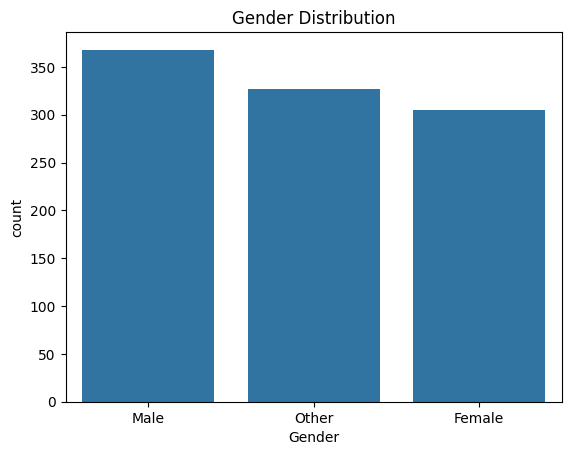

In [14]:
# 5. Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

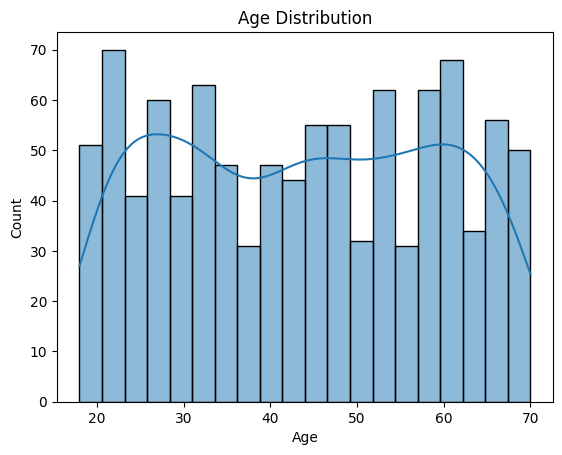

In [15]:
# 6. Age Distribution
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

In [16]:
print(df['Location'].value_counts().head(10))

Location
East Stephanietown, Mozambique              1
New Roberttown, Bermuda                     1
Curtisfurt, Bhutan                          1
Port Jesseville, Hong Kong                  1
East Lydiamouth, Iran                       1
Juliechester, Ukraine                       1
Lake Nicoleview, Seychelles                 1
New Mariotown, Bouvet Island (Bouvetoya)    1
East Jenniferton, Montenegro                1
Port Jennifertown, Seychelles               1
Name: count, dtype: int64


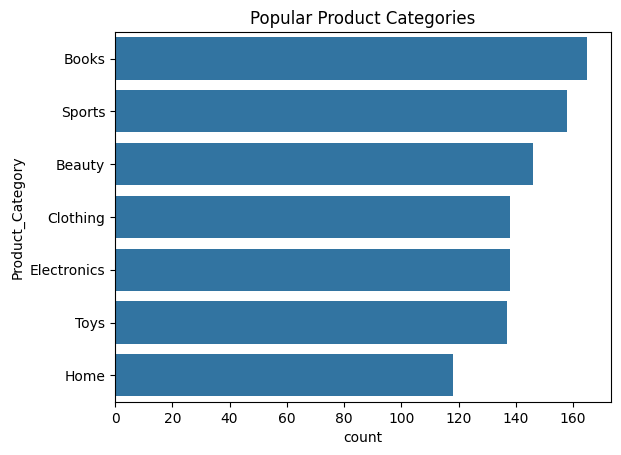

In [17]:
# 8. Popular Product Categories
sns.countplot(y='Product_Category', data=df, order=df['Product_Category'].value_counts().index)
plt.title('Popular Product Categories')
plt.show()

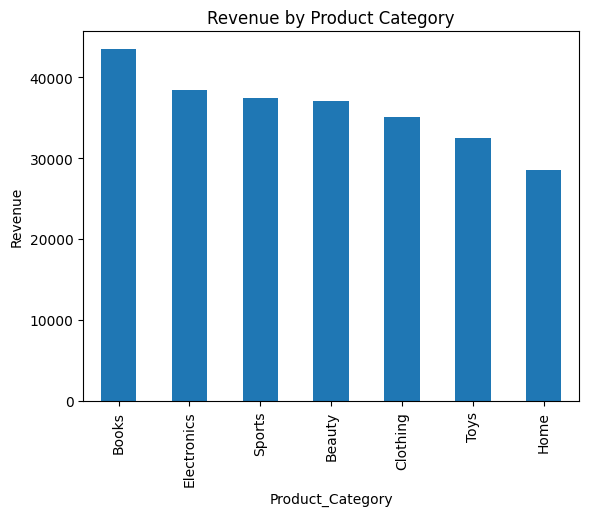

In [18]:
# 9. Revenue by Category
revenue_by_cat = df.groupby('Product_Category')['Price'].sum().sort_values(ascending=False)
revenue_by_cat.plot(kind='bar', title='Revenue by Product Category')
plt.ylabel('Revenue')
plt.show()

In [19]:
# 10. Average Spend per Customer
avg_spend = df.groupby('Customer_ID')['Price'].sum().mean()
print(f"Average Spend per Customer: {avg_spend:.2f}")

Average Spend per Customer: 252.51


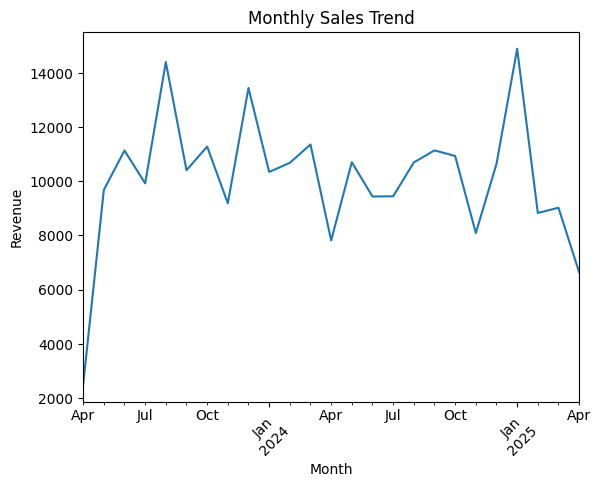

In [20]:
# 11. Monthly Sales Trend
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Price'].sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

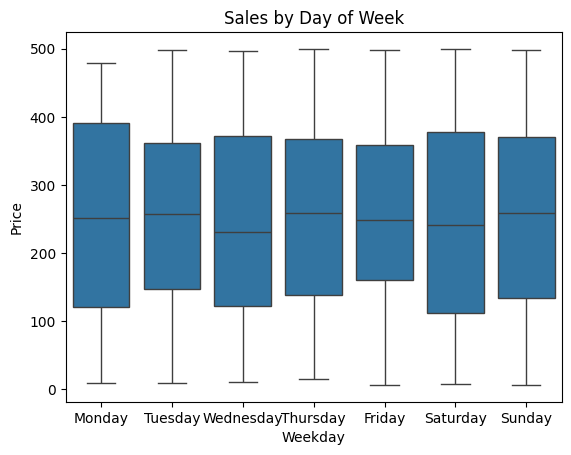

In [21]:
# 12. Weekly Sales Trend
df['Weekday'] = df['Purchase_Date'].dt.day_name()
sns.boxplot(x='Weekday', y='Price', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Sales by Day of Week')
plt.show()

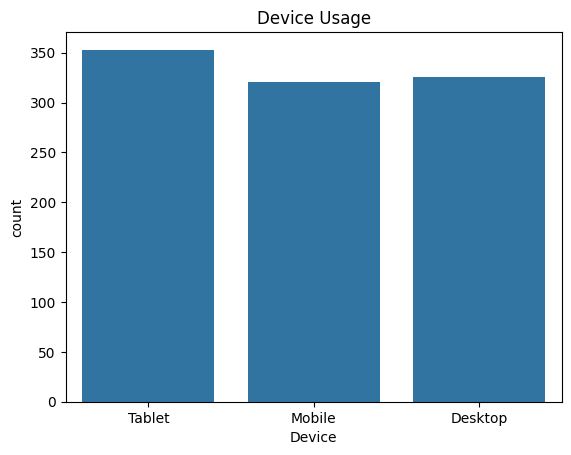

In [22]:
# 13. Device Usage
sns.countplot(x='Device', data=df)
plt.title('Device Usage')
plt.show()

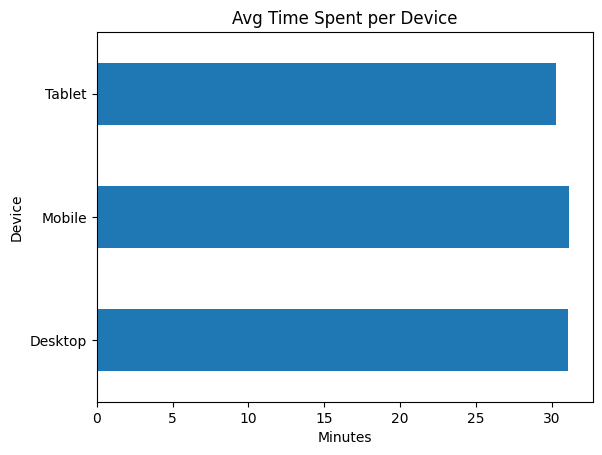

In [23]:
# 14. Average Time Spent by Device
time_by_device = df.groupby('Device')['Time_Spent'].mean()
time_by_device.plot(kind='barh', title='Avg Time Spent per Device')
plt.xlabel('Minutes')
plt.show()

In [24]:
# 15. Pages Visited Stats
print(df['Pages_Visited'].describe())

count    1000.000000
mean       10.589000
std         5.717234
min         1.000000
25%         5.000000
50%        11.000000
75%        15.000000
max        20.000000
Name: Pages_Visited, dtype: float64


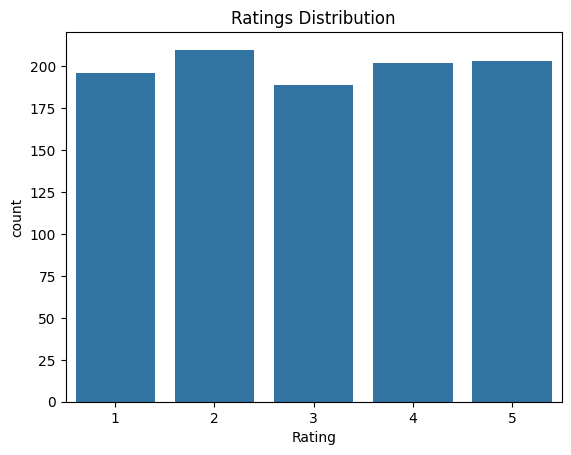

In [25]:
# 16. Ratings Distribution
sns.countplot(x='Rating', data=df)
plt.title('Ratings Distribution')
plt.show()

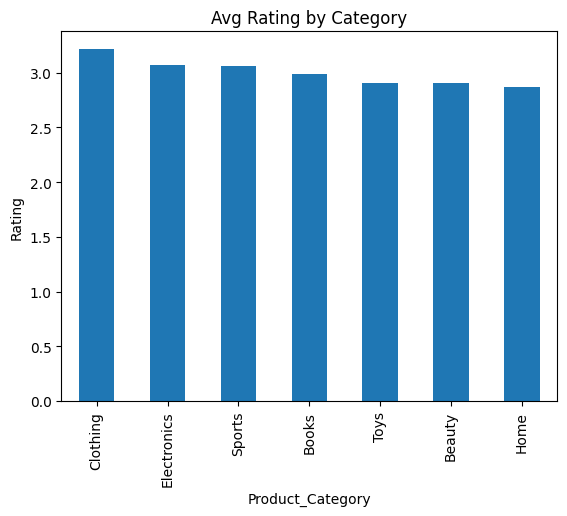

In [26]:
# 17. Average Rating by Category
avg_rating = df.groupby('Product_Category')['Rating'].mean().sort_values(ascending=False)
avg_rating.plot(kind='bar', title='Avg Rating by Category')
plt.ylabel('Rating')
plt.show()

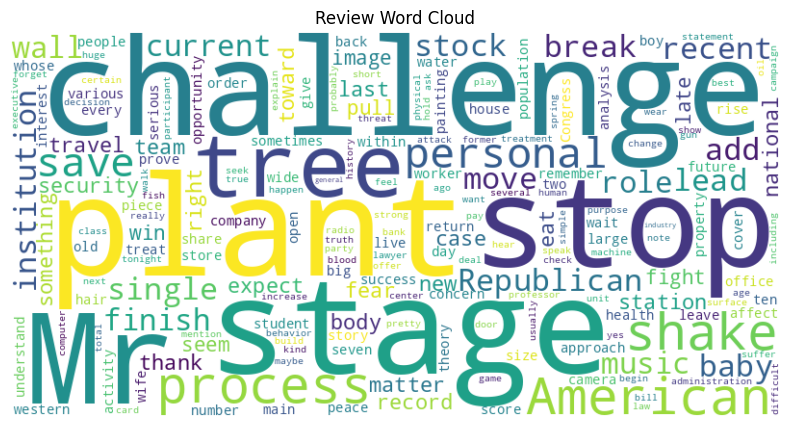

In [27]:
# 18. Review Word Cloud
text = " ".join(df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Review Word Cloud')
plt.show()

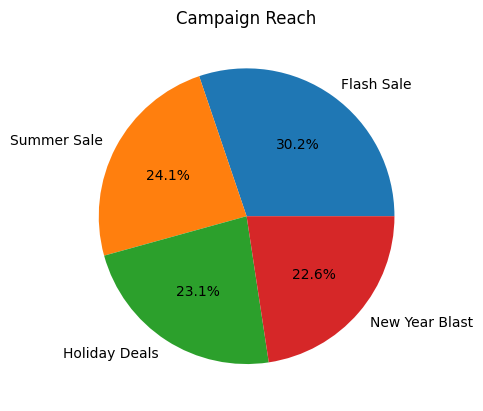

In [28]:
# 19. Marketing Campaign Reach
df['Marketing_Campaign'].value_counts().plot.pie(autopct='%1.1f%%', title='Campaign Reach')
plt.ylabel('')
plt.show()

In [29]:
# 20. Marketing Response Rate
response_rate = df['Marketing_Response'].value_counts(normalize=True) * 100
print(response_rate)

Marketing_Response
No     50.8
Yes    49.2
Name: proportion, dtype: float64


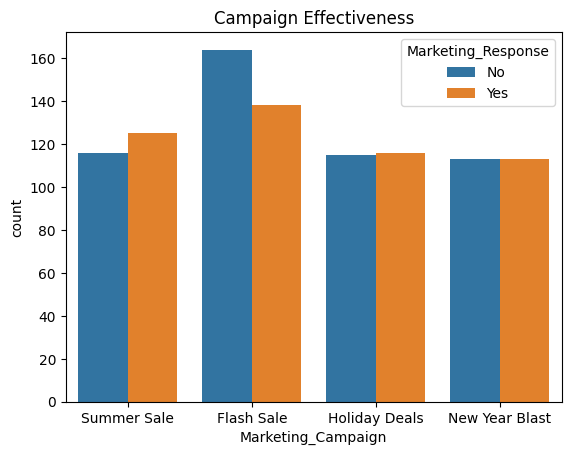

In [30]:
# 21. Campaign Effectiveness
sns.countplot(x='Marketing_Campaign', hue='Marketing_Response', data=df)
plt.title('Campaign Effectiveness')
plt.show()

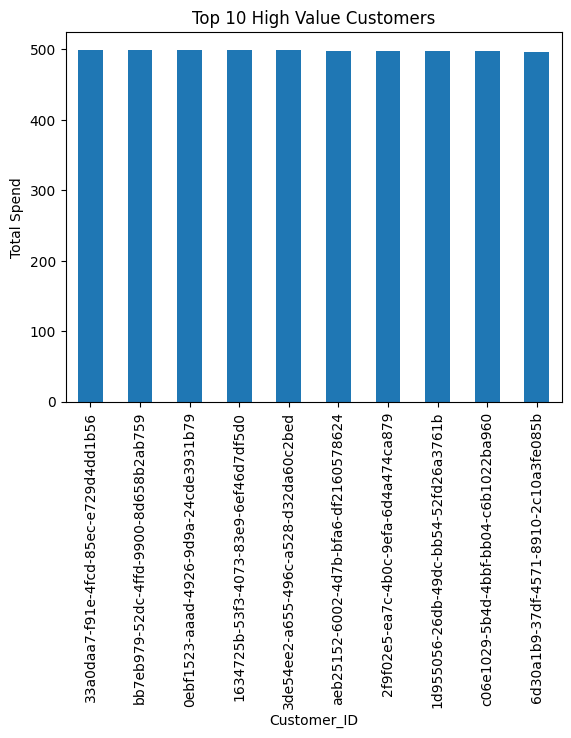

In [31]:
# 22. Top 10 High Value Customers
customer_spend = df.groupby('Customer_ID')['Price'].sum().sort_values(ascending=False).head(10)
customer_spend.plot(kind='bar', title='Top 10 High Value Customers')
plt.ylabel('Total Spend')
plt.show()

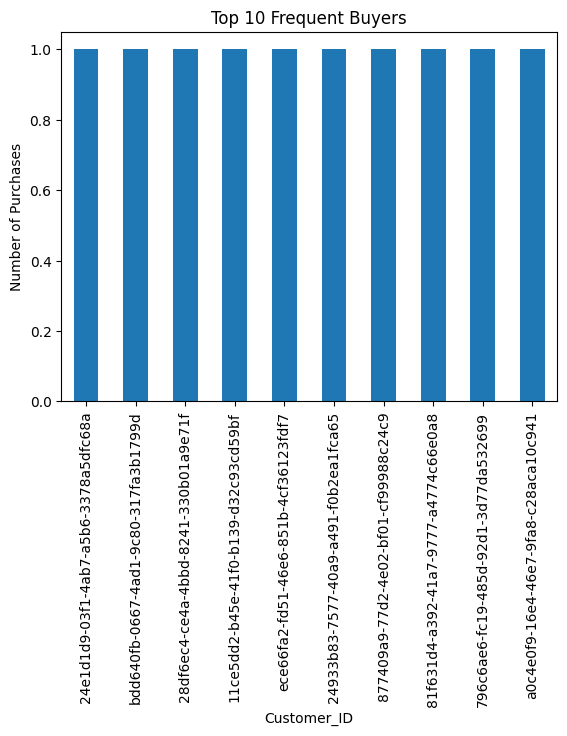

In [32]:
# 23. Frequent Buyers
purchase_count = df['Customer_ID'].value_counts().head(10)
purchase_count.plot(kind='bar', title='Top 10 Frequent Buyers')
plt.ylabel('Number of Purchases')
plt.show()

<ipython-input-33-80054b8c25f6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = df.groupby('Age_Group')['Price'].sum()


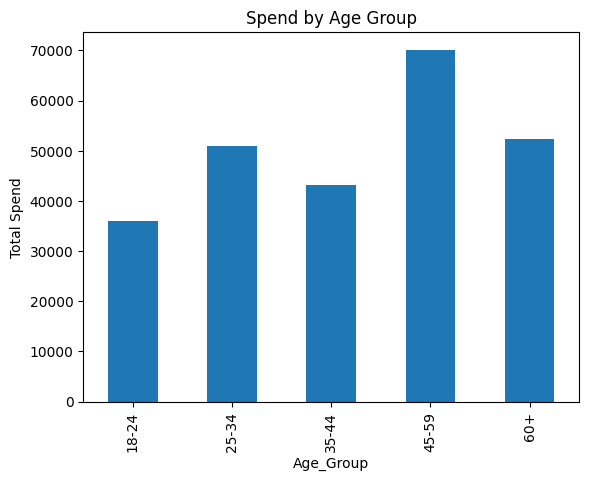

In [33]:

# 24. Spend by Age Group
bins = [18, 25, 35, 45, 60, 80]
labels = ['18-24','25-34','35-44','45-59','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_spend = df.groupby('Age_Group')['Price'].sum()
age_spend.plot(kind='bar', title='Spend by Age Group')
plt.ylabel('Total Spend')
plt.show()

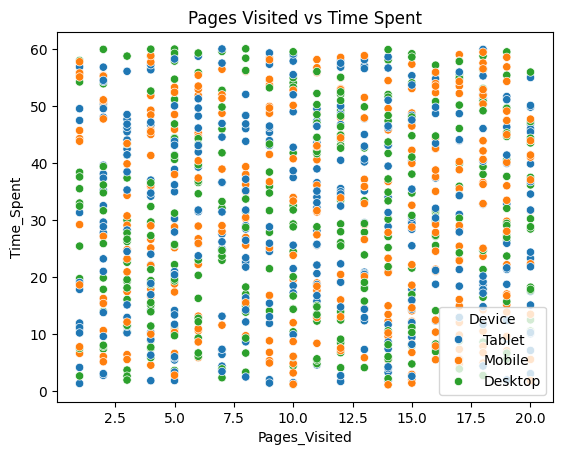

In [34]:
# 25. Pages vs Time Scatter
sns.scatterplot(x='Pages_Visited', y='Time_Spent', hue='Device', data=df)
plt.title('Pages Visited vs Time Spent')
plt.show()

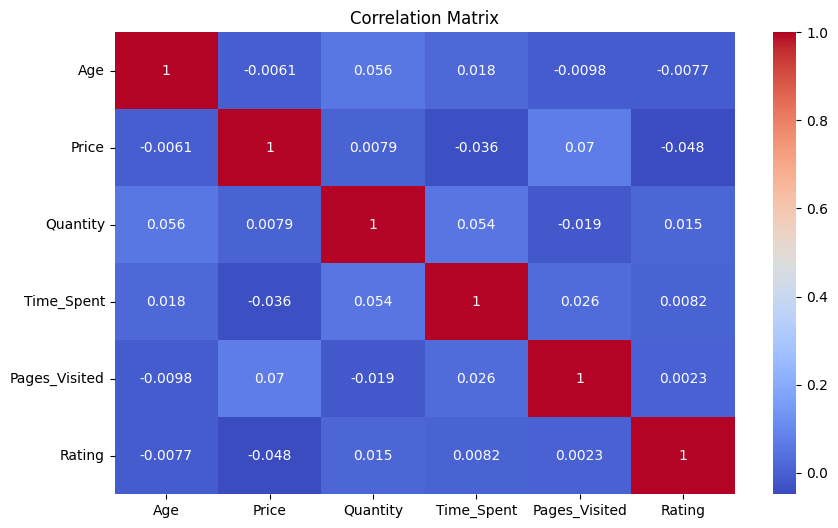

In [35]:
# 26. Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df[['Age', 'Price', 'Quantity', 'Time_Spent', 'Pages_Visited', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# Additional preprocessing
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Month'] = df['Purchase_Date'].dt.to_period('M')
df['Weekday'] = df['Purchase_Date'].dt.day_name()
df['Total_Spend'] = df['Price'] * df['Quantity']
bins = [18, 25, 35, 45, 60, 80]
labels = ['18-24','25-34','35-44','45-59','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

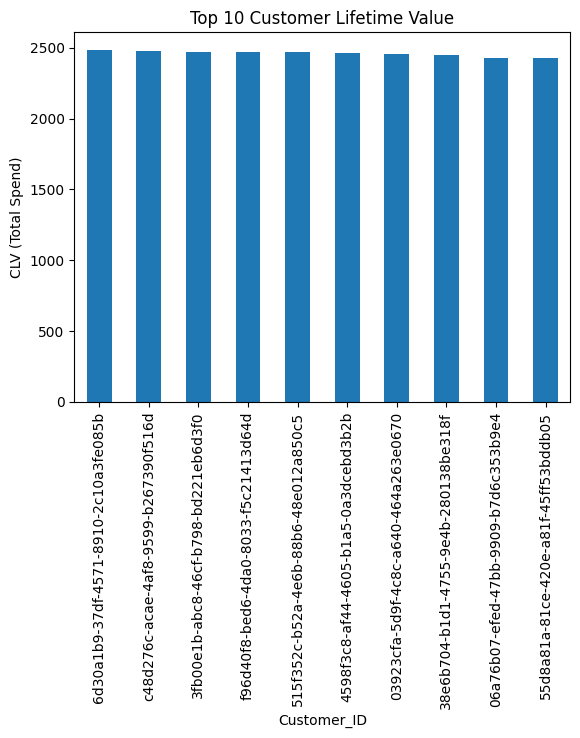

In [37]:
# 27. Customer Lifetime Value (CLV)
clv = df.groupby('Customer_ID')['Total_Spend'].sum().sort_values(ascending=False)
clv.head(10).plot(kind='bar', title='Top 10 Customer Lifetime Value')
plt.ylabel('CLV (Total Spend)')
plt.show()

In [38]:
# 28. Average Order Value (AOV)
aov = df['Total_Spend'].sum() / df['Customer_ID'].nunique()
print(f"Average Order Value: {aov:.2f}")

Average Order Value: 781.86


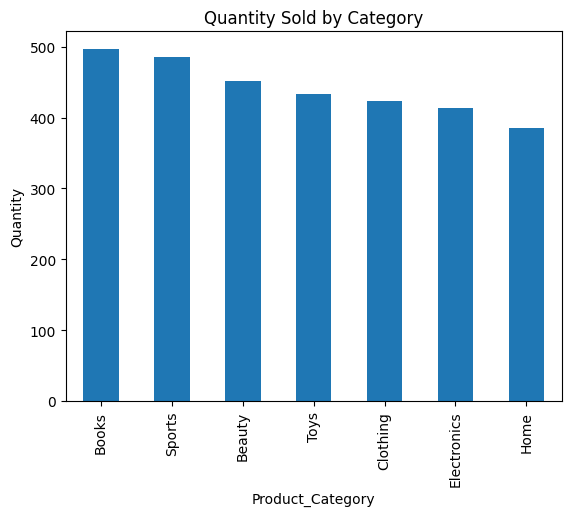

In [39]:
# 29. Category-wise Quantity Sold
cat_qty = df.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False)
cat_qty.plot(kind='bar', title='Quantity Sold by Category')
plt.ylabel('Quantity')
plt.show()

In [40]:
# 30. Repeat Purchase Rate
repeat_customers = df[df.duplicated(subset='Customer_ID', keep=False)]['Customer_ID'].nunique()
total_customers = df['Customer_ID'].nunique()
repeat_rate = (repeat_customers / total_customers) * 100
print(f"Repeat Purchase Rate: {repeat_rate:.2f}%")

Repeat Purchase Rate: 0.00%


In [41]:
# 31. Revenue Contribution by Top 20% Customers
total_spend = df.groupby('Customer_ID')['Total_Spend'].sum()
top_20_cutoff = int(0.2 * len(total_spend))
top_20_contrib = total_spend.sort_values(ascending=False).head(top_20_cutoff).sum()
total_revenue = total_spend.sum()
contribution_percent = (top_20_contrib / total_revenue) * 100
print(f"Top 20% Customers contribute {contribution_percent:.2f}% of Revenue")

Top 20% Customers contribute 44.62% of Revenue


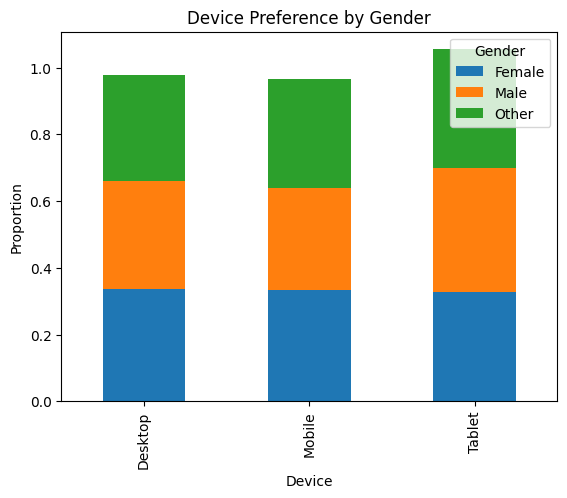

In [42]:
# 32. Device Preference by Gender
device_gender = pd.crosstab(df['Device'], df['Gender'], normalize='columns')
device_gender.plot(kind='bar', stacked=True, title='Device Preference by Gender')
plt.ylabel('Proportion')
plt.show()

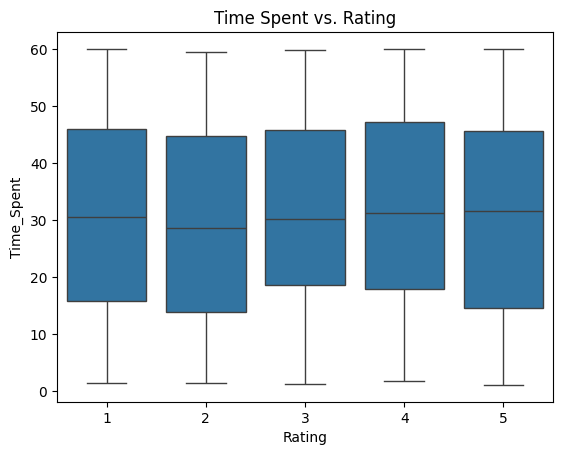

In [43]:
# 33. Time Spent vs. Rating Analysis
sns.boxplot(x='Rating', y='Time_Spent', data=df)
plt.title('Time Spent vs. Rating')
plt.show()

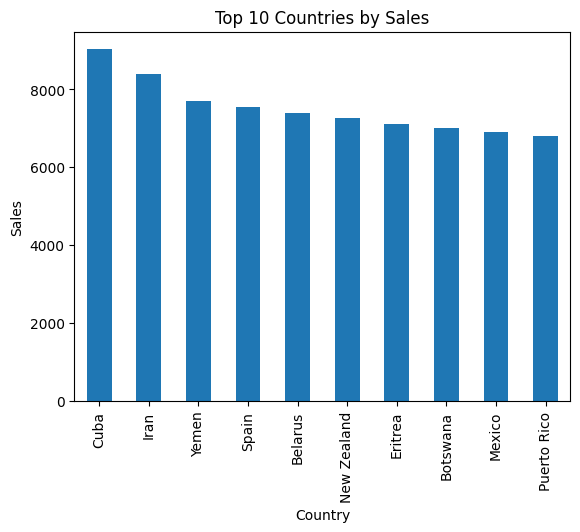

In [44]:
# 34. Sales by Region (Country-Level Aggregation)
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())
sales_by_country = df.groupby('Country')['Total_Spend'].sum().sort_values(ascending=False).head(10)
sales_by_country.plot(kind='bar', title='Top 10 Countries by Sales')
plt.ylabel('Sales')
plt.show()


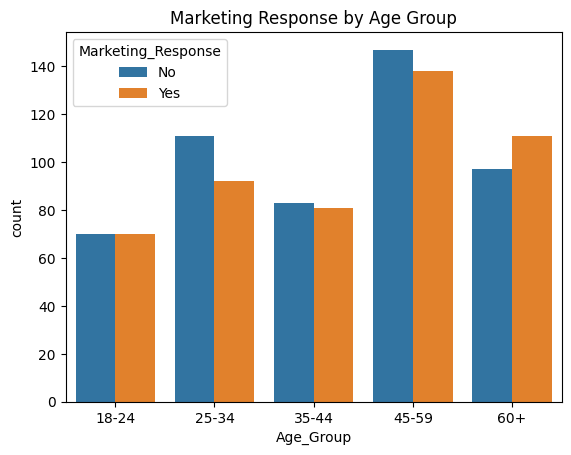

In [45]:
# 35. Age Group vs. Marketing Response
sns.countplot(x='Age_Group', hue='Marketing_Response', data=df)
plt.title('Marketing Response by Age Group')
plt.show()